In [2]:
import torchvision.datasets as datasets
import numpy as np
import torch
import torchvision.transforms as transforms
import os
import json
import PIL
import matplotlib.pyplot as plt

/work3/s183920/02514-DLCI/DLCI-venv/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/work3/s183920/02514-DLCI/DLCI-venv/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c104cuda20CUDACachingAllocator9allocatorE'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


Number of train images: 960
Number of val images: 192
Number of test images: 300
{'id': 187, 'width': 1824, 'height': 4000, 'file_name': 'batch_10/000086.jpg', 'license': 'CC', 'flickr_url': 'https://farm66.staticflickr.com/65535/48694281572_345d41b03a_o.png', 'flickr_640_url': 'https://farm66.staticflickr.com/65535/48694281572_c0765a26e1_z.jpg', 'coco_url': None, 'date_captured': None}
{'id': 188, 'image_id': 75, 'category_id': 7, 'segmentation': [[705.0, 1244.0, 710.0, 1267.0, 715.0, 1293.0, 720.0, 1316.0, 726.0, 1344.0, 731.0, 1362.0, 734.0, 1370.0, 737.0, 1370.0, 737.0, 1374.0, 729.0, 1374.0, 709.0, 1377.0, 702.0, 1376.0, 694.0, 1375.0, 691.0, 1373.0, 687.0, 1372.0, 685.0, 1366.0, 680.0, 1356.0, 671.0, 1322.0, 665.0, 1295.0, 659.0, 1264.0, 657.0, 1243.0, 658.0, 1236.0, 661.0, 1230.0, 665.0, 1226.0, 680.0, 1222.0, 697.0, 1218.0, 701.0, 1217.0, 703.0, 1217.0, 703.0, 1219.0, 700.0, 1220.0, 705.0, 1244.0]], 'area': 7473.5, 'bbox': [657.0, 1217.0, 80.0, 160.0], 'iscrowd': 0}


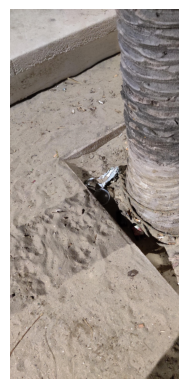

Number of train images: 960
Number of val images: 192
Number of test images: 300
{'id': 1334, 'width': 2448, 'height': 3264, 'file_name': 'batch_8/000034.jpg', 'license': 'CC', 'flickr_url': 'https://farm66.staticflickr.com/65535/48580512617_33271a3a3e_o.png', 'flickr_640_url': 'https://farm66.staticflickr.com/65535/48580512617_67af26192c_z.jpg', 'coco_url': None, 'date_captured': None}
{'id': 1334, 'image_id': 383, 'category_id': 39, 'segmentation': [[547, 2283, 547, 2231, 514, 2176, 474, 2099, 488, 2086, 532, 2065, 614, 2043, 665, 2080, 643, 2104, 646, 2123, 704, 2130, 742, 2136, 780, 2126, 814, 2121, 836, 2119, 852, 2123, 918, 2105, 970, 2091, 1013, 2076, 1057, 2071, 1167, 2036, 1182, 2026, 1201, 2002, 1336, 1946, 1530, 1870, 1593, 1841, 1644, 1792, 1696, 1733, 1659, 1659, 1592, 1544, 1632, 1525, 1655, 1534, 1651, 1457, 1644, 1412, 1615, 1312, 1582, 1182, 1554, 1122, 1512, 1042, 1481, 999, 1439, 930, 1440, 918, 1452, 878, 1446, 821, 1440, 800, 1437, 722, 1435, 669, 1430, 588, 1422, 

In [3]:
class TacoDataset(torch.utils.data.Dataset):
    """
    Class to store the food data
    """
    root_dir = '/dtu/datasets1/02514/data_wastedetection/'
    anns_file_path = root_dir + '/' + 'annotations.json'
    
    def __init__(self, datatype = "train"):
        self.datatype = datatype
        
        # Read annotations
        with open(self.anns_file_path, 'r') as f:
            self.dataset = json.loads(f.read())
        
        self.categories = self.dataset['categories']
        self.anns = self.dataset['annotations']
        self.imgs = self.dataset['images']
        
        # split into train and test
        idxs = np.arange(len(self.imgs))
        idxs = np.random.permutation(idxs)
        self.train_idxs = idxs[:int(0.8*len(idxs))]
        self.test_idxs = idxs[int(0.8*len(idxs)):]
        self.train_idxs = self.train_idxs[:int(0.8*len(self.train_idxs))]
        self.val_idxs = self.train_idxs[int(0.8*len(self.train_idxs)):]
        
        print(f"Number of train images: {len(self.train_idxs)}")
        print(f"Number of val images: {len(self.val_idxs)}")
        print(f"Number of test images: {len(self.test_idxs)}")
        
        
        self.transform = transforms.Compose([
            transforms.PILToTensor(),
        ])
        
    def __getitem__(self, idx):
        if self.datatype == "train":
            idx = self.train_idxs[idx]
        elif self.datatype == "val":
            idx = self.val_idxs[idx]
        elif self.datatype == "test":
            idx = self.test_idxs[idx]
        
        # get data
        img_meta = self.imgs[idx]
        img_ann = self.anns[idx]
        # img = np.load(self.root_dir + img_meta['file_name'])
        img = PIL.Image.open(self.root_dir + img_meta['file_name'])
        img = self.transform(img)
        
        return img, img_meta, img_ann
    
def show_img(img, ax = None):
    if ax is None:
        fig, ax = plt.subplots()
        
    ax.imshow(img.permute(1, 2, 0))
    ax.axis('off')
    
    return ax

for i in range(2):
    dataset = TacoDataset(datatype = "train")
    img, img_meta, img_ann = dataset[i]
    print(img_meta)
    print(img_ann)
    show_img(img)
    plt.show()